<a href="https://colab.research.google.com/github/jingxian-li/EECS_542_Project/blob/main/IQA_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Demo for IQA-PyTorch


<a href="https://colab.research.google.com/drive/14J3KoyrjJ6R531DsdOy5Bza5xfeMODi6?usp=sharing"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="google colab logo"></a>
[![GitHub Stars](https://img.shields.io/github/stars/chaofengc/IQA-PyTorch?style=social)](https://github.com/chaofengc/IQA-PyTorch)
[![PyPI](https://img.shields.io/pypi/v/pyiqa)](https://pypi.org/project/pyiqa/)
![visitors](https://visitor-badge.laobi.icu/badge?page_id=chaofengc/IQA-PyTorch)

[Installation](#scrollTo=tcVxXhwr8yk0)

[Basic Usage](#scrollTo=UcOqHOJp9aZF)

>[Create metric function](#scrollTo=UcOqHOJp9aZF)

>[Test with paths as input](#scrollTo=1X5VA8xn_mAJ)

>[Test with tensor inputs](#scrollTo=t4VFP1SQBuy9)

>[Test with directory inputs (FID score)](#scrollTo=oN_sw_jdGTVk)

# Installation

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
%cd /content/drive/MyDrive/Colab_Notebooks

Mounted at /content/drive
/content/drive/MyDrive/Colab_Notebooks


In [ ]:
!git clone https://github.com/chaofengc/IQA-PyTorch.git
%cd IQA-PyTorch
!pip install -r requirements.txt
!python setup.py develop

fatal: destination path 'IQA-PyTorch' already exists and is not an empty directory.
/content/drive/MyDrive/Colab_Notebooks/IQA-PyTorch
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 299.2/299.2 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 16.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 254.7/254.7 kB 20.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.6/44.6 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 39.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.6/59.6 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 49.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.6/297.6 kB 20.9 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  

# Basic Usage

### Create metric function

In [ ]:
import pyiqa
import torch

# List available models
print(pyiqa.list_models())

['ahiq', 'brisque', 'ckdn', 'clipiqa', 'clipiqa+', 'clipiqa+_rn50_512', 'clipiqa+_vitL14_512', 'clipscore', 'cnniqa', 'cw_ssim', 'dbcnn', 'dists', 'entropy', 'fid', 'fsim', 'gmsd', 'hyperiqa', 'ilniqe', 'laion_aes', 'liqe', 'liqe_mix', 'lpips', 'lpips-vgg', 'mad', 'maniqa', 'maniqa-kadid', 'maniqa-koniq', 'maniqa-pipal', 'ms_ssim', 'musiq', 'musiq-ava', 'musiq-koniq', 'musiq-paq2piq', 'musiq-spaq', 'nima', 'nima-koniq', 'nima-spaq', 'nima-vgg16-ava', 'niqe', 'nlpd', 'nrqm', 'paq2piq', 'pi', 'pieapp', 'psnr', 'psnry', 'qalign', 'ssim', 'ssimc', 'stlpips', 'stlpips-vgg', 'topiq_fr', 'topiq_fr-pipal', 'topiq_iaa', 'topiq_iaa_res50', 'topiq_nr', 'topiq_nr-face', 'topiq_nr-flive', 'topiq_nr-spaq', 'tres', 'tres-flive', 'tres-koniq', 'unique', 'uranker', 'vif', 'vsi', 'wadiqam_fr', 'wadiqam_nr']


In [ ]:
# create metric function, for example lpips
lpips_metric = pyiqa.create_metric('lpips')
niqe_metric = pyiqa.create_metric('niqe')
fid_metric = pyiqa.create_metric('fid')
psnr_metric = pyiqa.create_metric('psnr')
ssim_metric = pyiqa.create_metric('ssim')

Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth
100%|██████████| 233M/233M [00:04<00:00, 57.3MB/s]


Downloading: "https://github.com/chaofengc/IQA-Toolbox-Python/releases/download/v0.1-weights/LPIPS_v0.1_alex-df73285e.pth" to /root/.cache/torch/hub/checkpoints/LPIPS_v0.1_alex-df73285e.pth



100%|██████████| 5.87k/5.87k [00:00<00:00, 9.35MB/s]


Loading pretrained model LPIPS from /root/.cache/torch/hub/checkpoints/LPIPS_v0.1_alex-df73285e.pth
Downloading: "https://github.com/chaofengc/IQA-PyTorch/releases/download/v0.1-weights/niqe_modelparameters.mat" to /root/.cache/torch/hub/checkpoints/niqe_modelparameters.mat



100%|██████████| 8.15k/8.15k [00:00<00:00, 12.5MB/s]
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Downloading: "https://github.com/mseitzer/pytorch-fid/releases/download/fid_weights/pt_inception-2015-12-05-6726825d.pth" to /root/.cache/torch/hub/checkpoints/pt_inception-2015-12-05-6726825d.pth



100%|██████████| 91.2M/91.2M [00:00<00:00, 114MB/s]


Loading pretrained model Inception3 from /root/.cache/torch/hub/checkpoints/pt_inception-2015-12-05-6726825d.pth


### Test with paths as input

LPIPS score: 0.7237
NIQE score: 15.6550
SSIM score: 0.6997
PSNR score: 21.1136


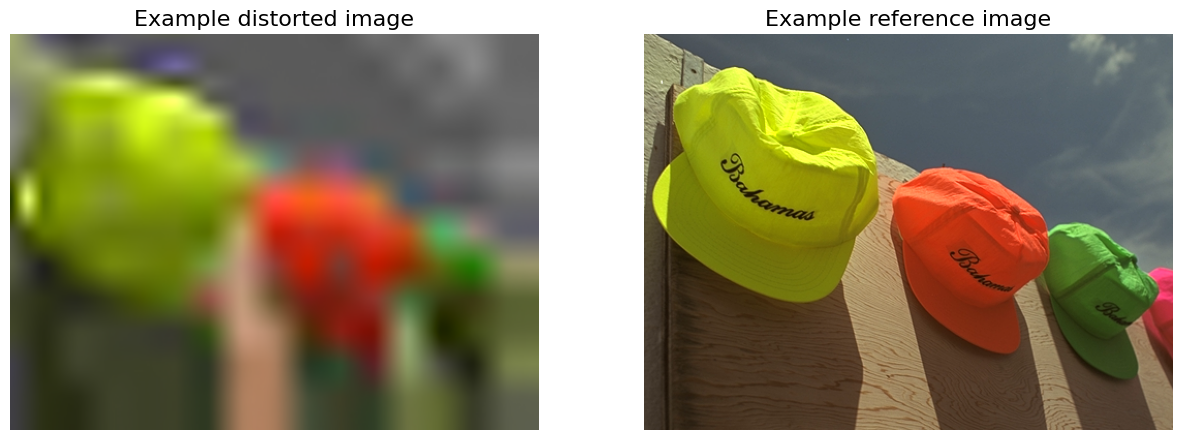

In [ ]:
# Show example images
from PIL import Image
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15, 8))
ax1 = fig.add_subplot(1, 2, 1)
plt.title('Example distorted image', fontsize=16)
ax1.axis('off')
ax2 = fig.add_subplot(1, 2, 2)
plt.title('Example reference image', fontsize=16)
ax2.axis('off')
ax1.imshow(Image.open('./ResultsCalibra/dist_dir/I03.bmp'))
ax2.imshow(Image.open('./ResultsCalibra/ref_dir/I03.bmp'))

# LPIPS takes two corresponding images: (distorted image, reference image)
lpips_score = lpips_metric('./ResultsCalibra/dist_dir/I03.bmp', './ResultsCalibra/ref_dir/I03.bmp')
print(f'LPIPS score: {lpips_score:.4f}')

# NIQE takes the distortion image
niqe_score = niqe_metric('./ResultsCalibra/dist_dir/I03.bmp')
print(f'NIQE score: {niqe_score:.4f}')

# ssim takes two corresponding images: (distorted image, reference image)
ssim_score = ssim_metric('./ResultsCalibra/dist_dir/I03.bmp', './ResultsCalibra/ref_dir/I03.bmp')
print(f'SSIM score: {ssim_score.item():.4f}')

# psnr takes two corresponding images: (distorted image, reference image)
psnr_score = psnr_metric('./ResultsCalibra/dist_dir/I03.bmp', './ResultsCalibra/ref_dir/I03.bmp')
print(f'PSNR score: {psnr_score.item():.4f}')


In [ ]:
from PIL import Image

def resize(image_pil, width, height):
    '''
    Resize PIL image keeping ratio and using white background.
    '''
    ratio_w = width / image_pil.width
    ratio_h = height / image_pil.height
    if ratio_w < ratio_h:
        # It must be fixed by width
        resize_width = width
        resize_height = round(ratio_w * image_pil.height)
    else:
        # Fixed by height
        resize_width = round(ratio_h * image_pil.width)
        resize_height = height
    image_resize = image_pil.resize((resize_width, resize_height), Image.ANTIALIAS)
    background = Image.new('RGBA', (width, height), (255, 255, 255, 255))#
    offset = (round((width - resize_width) / 2), round((height - resize_height) / 2))
    background.paste(image_resize, offset)
    return background.convert('RGB')

## LRM

In [ ]:
gt_path = '/content/drive/MyDrive/Colab_Notebooks/LGM/data_test/hellwarrior.jpeg'
resize(Image.open(gt_path), 288, 288).save('/content/drive/MyDrive/Colab_Notebooks/LGM/data_test/hellwarrior_3.png')

<ipython-input-6-329b3fb93990>:17: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  image_resize = image_pil.resize((resize_width, resize_height), Image.ANTIALIAS)


LPIPS score: 0.2237
SSIM score: 0.8359
PSNR score: 15.0933


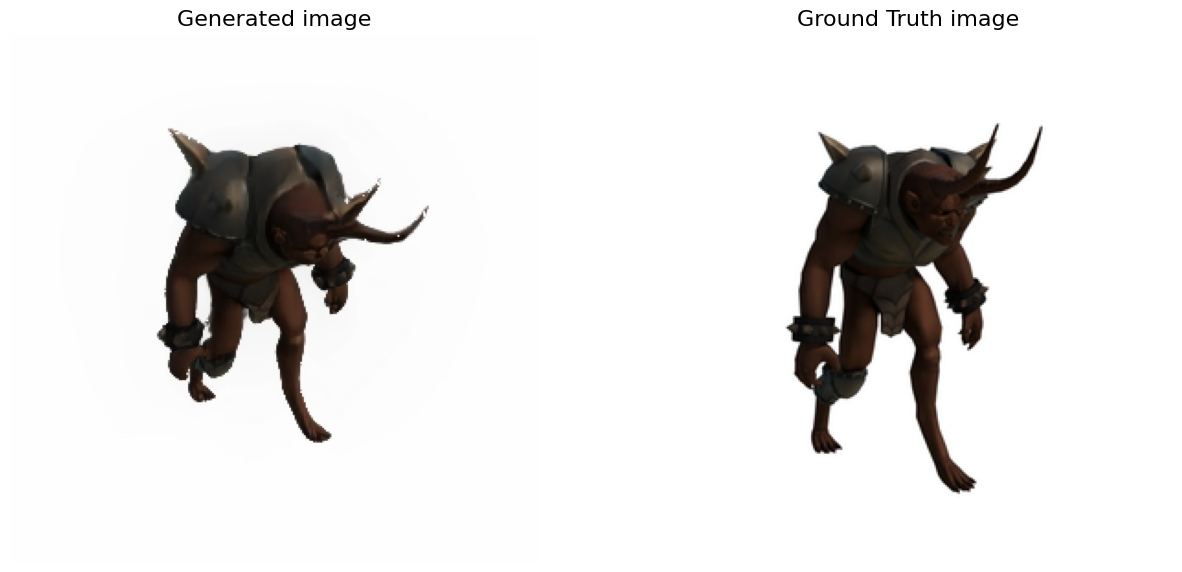

In [ ]:
gi_path = '/content/drive/MyDrive/Colab_Notebooks/openLRM.png'
gt_path = '/content/drive/MyDrive/Colab_Notebooks/LGM/data_test/hellwarrior_3.png'

# Show images
from PIL import Image
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15, 8))
ax1 = fig.add_subplot(1, 2, 1)
plt.title('Generated image', fontsize=16)
ax1.axis('off')
ax2 = fig.add_subplot(1, 2, 2)
plt.title('Ground Truth image', fontsize=16)
ax2.axis('off')

ax1.imshow(Image.open(gi_path))
ax2.imshow(Image.open(gt_path))

# LPIPS takes two corresponding images: (distorted image, reference image)
lpips_score = lpips_metric(gi_path,gt_path)
print(f'LPIPS score: {lpips_score:.4f}')

# SSIM takes two corresponding images: (distorted image, reference image)
ssim_score = ssim_metric(gi_path,gt_path)
print(f'SSIM score: {ssim_score.item():.4f}')

# PSNR takes two corresponding images: (distorted image, reference image)
psnr_score = psnr_metric(gi_path,gt_path)
print(f'PSNR score: {psnr_score.item():.4f}')

## Triplane Gaussian

In [ ]:
gt_path = '/content/drive/MyDrive/Colab_Notebooks/LGM/data_test/hellwarrior.jpeg'
resize(Image.open(gt_path), 256, 256).save('/content/drive/MyDrive/Colab_Notebooks/LGM/data_test/hellwarrior_4.png')

<ipython-input-6-329b3fb93990>:17: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  image_resize = image_pil.resize((resize_width, resize_height), Image.ANTIALIAS)


LPIPS score: 0.1440
SSIM score: 0.7951
PSNR score: 13.6636


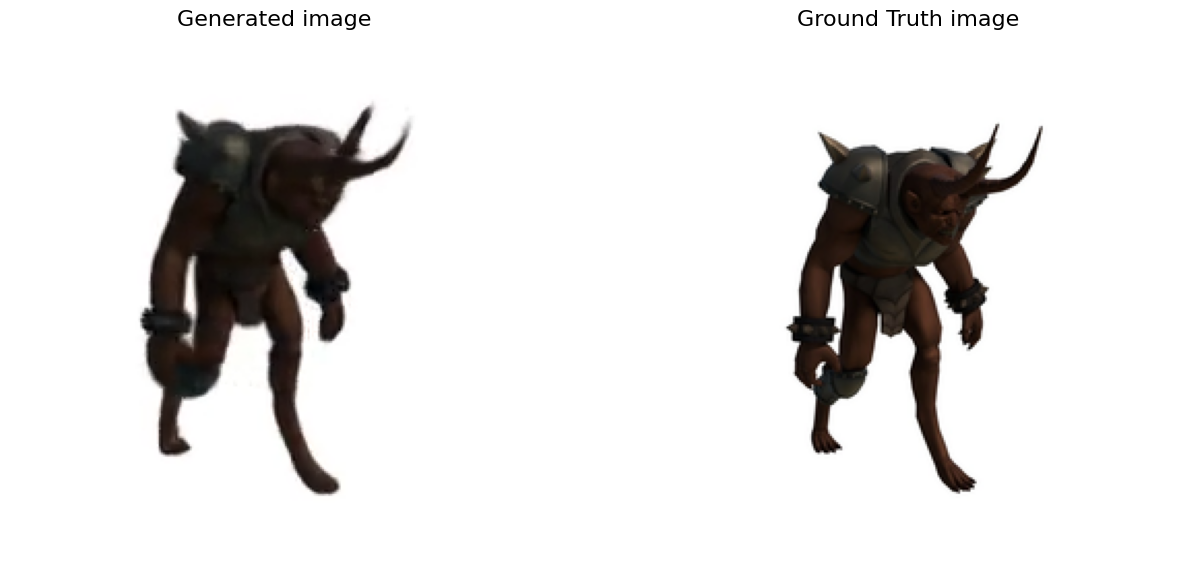

In [ ]:
gi_path = '/content/drive/MyDrive/Colab_Notebooks/triplanegaussian.png'
gt_path = '/content/drive/MyDrive/Colab_Notebooks/LGM/data_test/hellwarrior_4.png'

# Show images
from PIL import Image
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15, 8))
ax1 = fig.add_subplot(1, 2, 1)
plt.title('Generated image', fontsize=16)
ax1.axis('off')
ax2 = fig.add_subplot(1, 2, 2)
plt.title('Ground Truth image', fontsize=16)
ax2.axis('off')

ax1.imshow(Image.open(gi_path))
ax2.imshow(Image.open(gt_path))

# LPIPS takes two corresponding images: (distorted image, reference image)
lpips_score = lpips_metric(gi_path,gt_path)
print(f'LPIPS score: {lpips_score:.4f}')

# SSIM takes two corresponding images: (distorted image, reference image)
ssim_score = ssim_metric(gi_path,gt_path)
print(f'SSIM score: {ssim_score.item():.4f}')

# PSNR takes two corresponding images: (distorted image, reference image)
psnr_score = psnr_metric(gi_path,gt_path)
print(f'PSNR score: {psnr_score.item():.4f}')

LPIPS score: 0.1072
SSIM score: 0.8911
PSNR score: 24.5777


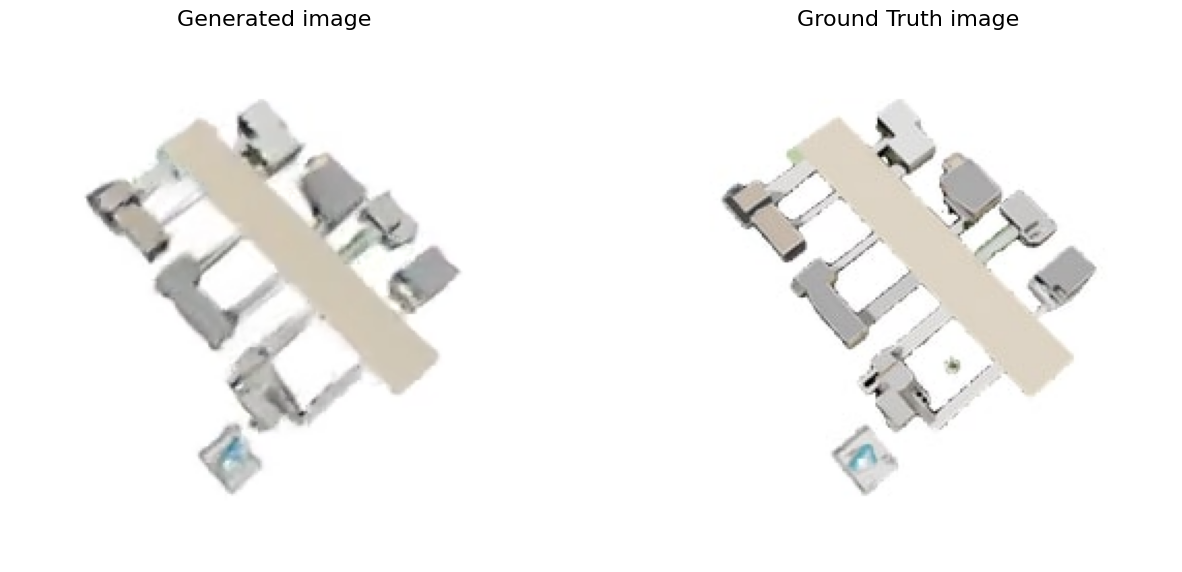

In [ ]:
gi_path = '/content/drive/MyDrive/Colab_Notebooks/house_tgs.png'
gt_path = '/content/drive/MyDrive/Colab_Notebooks/house_tgs_gt.jpeg'

# Show images
from PIL import Image
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15, 8))
ax1 = fig.add_subplot(1, 2, 1)
plt.title('Generated image', fontsize=16)
ax1.axis('off')
ax2 = fig.add_subplot(1, 2, 2)
plt.title('Ground Truth image', fontsize=16)
ax2.axis('off')

ax1.imshow(Image.open(gi_path))
ax2.imshow(Image.open(gt_path))

# LPIPS takes two corresponding images: (distorted image, reference image)
lpips_score = lpips_metric(gi_path,gt_path)
print(f'LPIPS score: {lpips_score:.4f}')

# SSIM takes two corresponding images: (distorted image, reference image)
ssim_score = ssim_metric(gi_path,gt_path)
print(f'SSIM score: {ssim_score.item():.4f}')

# PSNR takes two corresponding images: (distorted image, reference image)
psnr_score = psnr_metric(gi_path,gt_path)
print(f'PSNR score: {psnr_score.item():.4f}')

LPIPS score: 0.0847
SSIM score: 0.9059
PSNR score: 23.0107


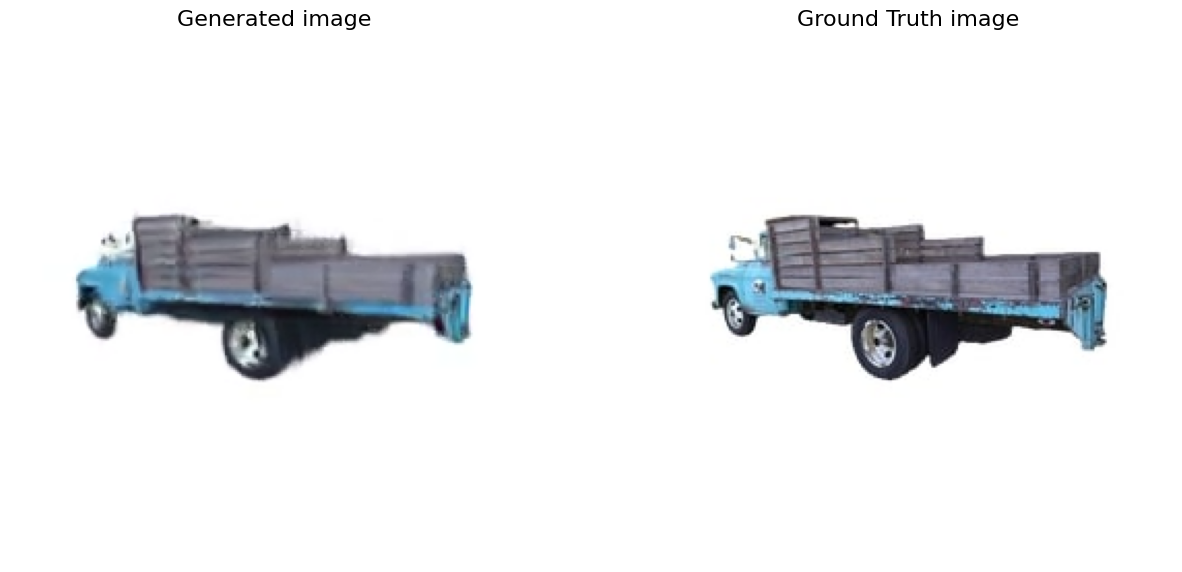

In [ ]:
gi_path = '/content/drive/MyDrive/Colab_Notebooks/truck_tgs.png'
gt_path = '/content/drive/MyDrive/Colab_Notebooks/truck_tgs_gt.jpg'

# Show images
from PIL import Image
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15, 8))
ax1 = fig.add_subplot(1, 2, 1)
plt.title('Generated image', fontsize=16)
ax1.axis('off')
ax2 = fig.add_subplot(1, 2, 2)
plt.title('Ground Truth image', fontsize=16)
ax2.axis('off')

ax1.imshow(Image.open(gi_path))
ax2.imshow(Image.open(gt_path))

# LPIPS takes two corresponding images: (distorted image, reference image)
lpips_score = lpips_metric(gi_path,gt_path)
print(f'LPIPS score: {lpips_score:.4f}')

# SSIM takes two corresponding images: (distorted image, reference image)
ssim_score = ssim_metric(gi_path,gt_path)
print(f'SSIM score: {ssim_score.item():.4f}')

# PSNR takes two corresponding images: (distorted image, reference image)
psnr_score = psnr_metric(gi_path,gt_path)
print(f'PSNR score: {psnr_score.item():.4f}')

## LGM

In [ ]:
gt_path = '/content/drive/MyDrive/Colab_Notebooks/LGM/data_test/hellwarrior.jpeg'
resize(Image.open(gt_path), 512, 512).save('/content/drive/MyDrive/Colab_Notebooks/LGM/data_test/hellwarrior_2.png')
#Image.open(gt_path).resize(512, 512).save('/content/drive/MyDrive/Colab_Notebooks/LGM/data_test/hellwarrior_2.png')

<ipython-input-31-74931297cb95>:17: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  image_resize = image_pil.resize((resize_width, resize_height), Image.ANTIALIAS)


LPIPS score: 0.2240
SSIM score: 0.8332
PSNR score: 13.0677


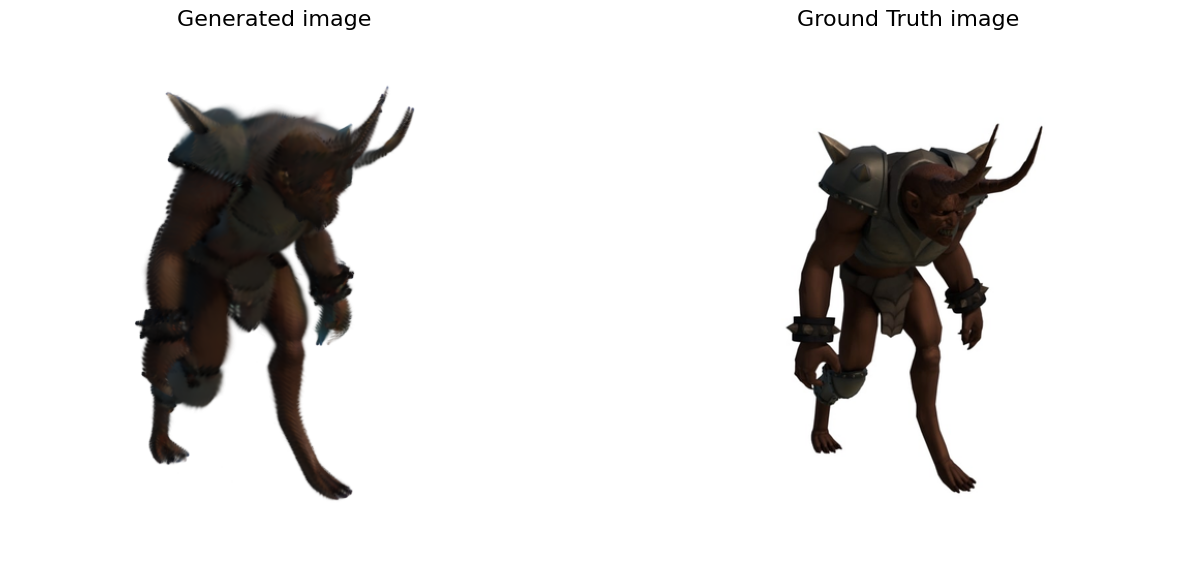

In [ ]:
gi_path = '/content/drive/MyDrive/Colab_Notebooks/LGM/workspace/hellwarrior/images/160.png'
gt_path = '/content/drive/MyDrive/Colab_Notebooks/LGM/data_test/hellwarrior_2.png'

# Show images
from PIL import Image
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15, 8))
ax1 = fig.add_subplot(1, 2, 1)
plt.title('Generated image', fontsize=16)
ax1.axis('off')
ax2 = fig.add_subplot(1, 2, 2)
plt.title('Ground Truth image', fontsize=16)
ax2.axis('off')

ax1.imshow(Image.open(gi_path))
ax2.imshow(Image.open(gt_path))

# LPIPS takes two corresponding images: (distorted image, reference image)
lpips_score = lpips_metric(gi_path,gt_path)
print(f'LPIPS score: {lpips_score:.4f}')

# SSIM takes two corresponding images: (distorted image, reference image)
ssim_score = ssim_metric(gi_path,gt_path)
print(f'SSIM score: {ssim_score.item():.4f}')

# PSNR takes two corresponding images: (distorted image, reference image)
psnr_score = psnr_metric(gi_path,gt_path)
print(f'PSNR score: {psnr_score.item():.4f}')

In [ ]:
gt_path = '/content/drive/MyDrive/Colab_Notebooks/LGM/data_test/house.jpg'
resize(Image.open(gt_path), 512, 512).save('/content/drive/MyDrive/Colab_Notebooks/LGM/data_test/house_2.png')

<ipython-input-31-74931297cb95>:17: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  image_resize = image_pil.resize((resize_width, resize_height), Image.ANTIALIAS)


LPIPS score: 0.3011
SSIM score: 0.8121
PSNR score: 16.6853


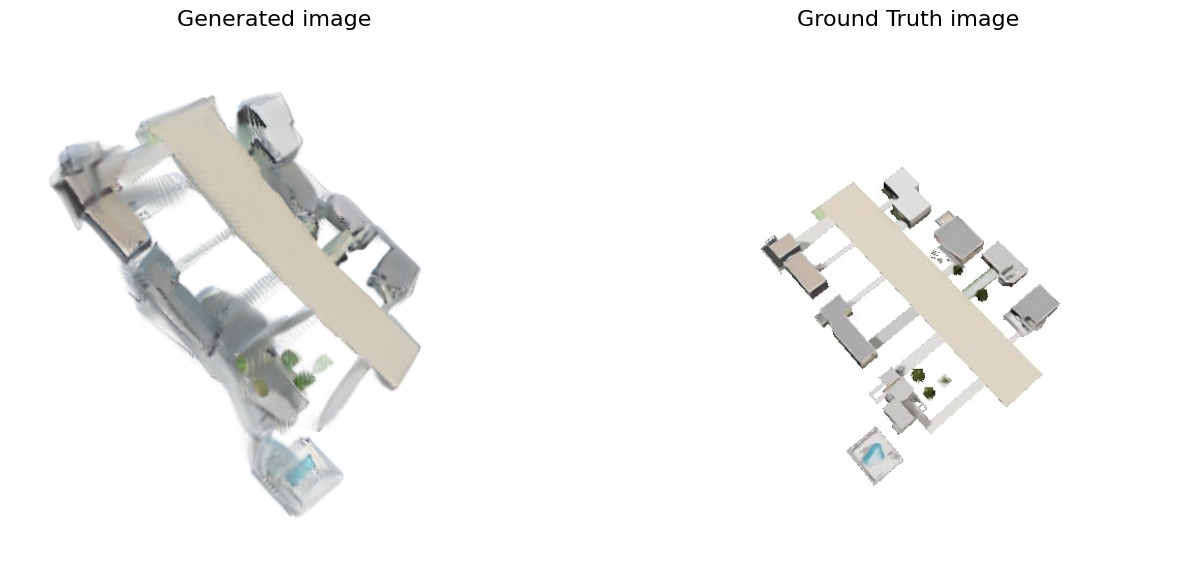

In [ ]:
gi_path = '/content/drive/MyDrive/Colab_Notebooks/LGM/workspace/house/images/140.png'
gt_path = '/content/drive/MyDrive/Colab_Notebooks/LGM/data_test/house_2.png'

# Show images
from PIL import Image
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15, 8))
ax1 = fig.add_subplot(1, 2, 1)
plt.title('Generated image', fontsize=16)
ax1.axis('off')
ax2 = fig.add_subplot(1, 2, 2)
plt.title('Ground Truth image', fontsize=16)
ax2.axis('off')

ax1.imshow(Image.open(gi_path))
ax2.imshow(Image.open(gt_path))

# LPIPS takes two corresponding images: (distorted image, reference image)
lpips_score = lpips_metric(gi_path,gt_path)
print(f'LPIPS score: {lpips_score:.4f}')

# SSIM takes two corresponding images: (distorted image, reference image)
ssim_score = ssim_metric(gi_path,gt_path)
print(f'SSIM score: {ssim_score.item():.4f}')

# PSNR takes two corresponding images: (distorted image, reference image)
psnr_score = psnr_metric(gi_path,gt_path)
print(f'PSNR score: {psnr_score.item():.4f}')

In [ ]:
gt_path = '/content/drive/MyDrive/Colab_Notebooks/LGM/data_test/truck_removebg.png'
resize(Image.open(gt_path), 512, 512).save('/content/drive/MyDrive/Colab_Notebooks/LGM/data_test/truck_removebg_2.png')

<ipython-input-16-f84f1460ee2d>:17: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  image_resize = image_pil.resize((resize_width, resize_height), Image.ANTIALIAS)


LPIPS score: 0.2173
SSIM score: 0.8131
PSNR score: 14.2740


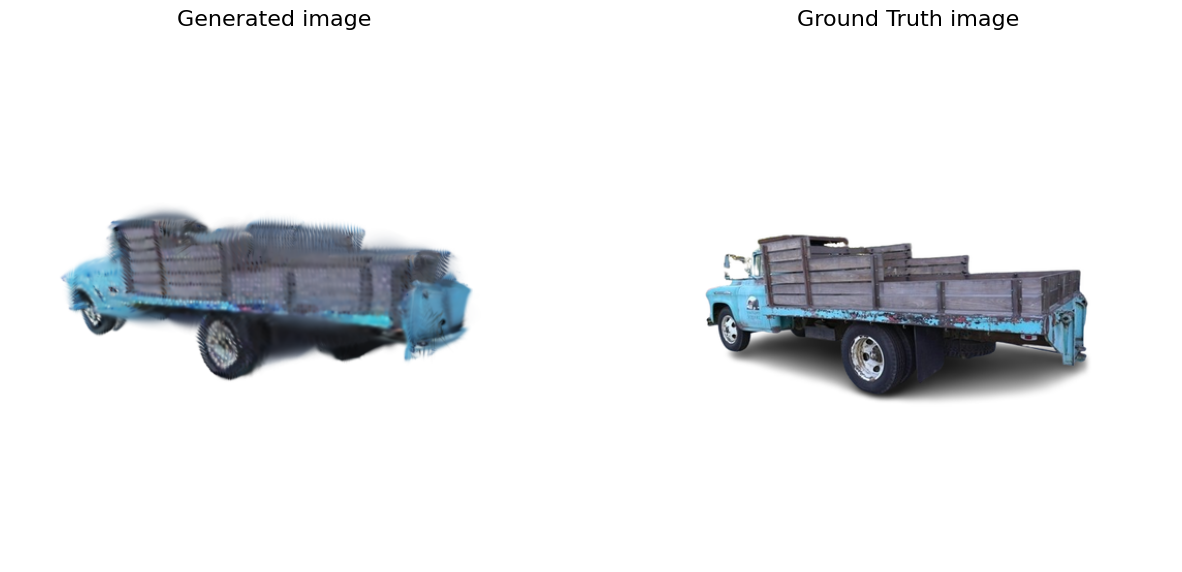

In [ ]:
gi_path = '/content/drive/MyDrive/Colab_Notebooks/LGM/workspace/truck/images/140.png'
gt_path = '/content/drive/MyDrive/Colab_Notebooks/LGM/data_test/truck_removebg_2.png'

# Show images
from PIL import Image
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15, 8))
ax1 = fig.add_subplot(1, 2, 1)
plt.title('Generated image', fontsize=16)
ax1.axis('off')
ax2 = fig.add_subplot(1, 2, 2)
plt.title('Ground Truth image', fontsize=16)
ax2.axis('off')

ax1.imshow(Image.open(gi_path))
ax2.imshow(Image.open(gt_path))

# LPIPS takes two corresponding images: (distorted image, reference image)
lpips_score = lpips_metric(gi_path,gt_path)
print(f'LPIPS score: {lpips_score:.4f}')

# SSIM takes two corresponding images: (distorted image, reference image)
ssim_score = ssim_metric(gi_path,gt_path)
print(f'SSIM score: {ssim_score.item():.4f}')

# PSNR takes two corresponding images: (distorted image, reference image)
psnr_score = psnr_metric(gi_path,gt_path)
print(f'PSNR score: {psnr_score.item():.4f}')

### Test with tensor inputs

In [ ]:
from pyiqa import imread2tensor

dist_img_tensor = imread2tensor('./ResultsCalibra/dist_dir/I03.bmp').unsqueeze(0).cuda()
ref_img_tensor = imread2tensor('./ResultsCalibra/ref_dir/I03.bmp').unsqueeze(0).cuda()

In [ ]:
lpips_score = lpips_metric(dist_img_tensor, ref_img_tensor)
print(f'LPIPS score: {lpips_score:.4f}')

niqe_score = niqe_metric(dist_img_tensor, ref_img_tensor)
print(f'NIQE score: {niqe_score:.4f}')


LPIPS score: 0.7237
NIQE score: 15.6538


### Test with directory inputs (FID score)

In [ ]:
# FID takes two directory inputs
fid_score = fid_metric('./ResultsCalibra/dist_dir/', './ResultsCalibra/ref_dir')
print(f'FID score: {fid_score:.4f}')

# We use clean-fid by default, you may also change to original fid by setting the `mode` parameter
legacy_fid_score = fid_metric('./ResultsCalibra/dist_dir/', './ResultsCalibra/ref_dir', mode='legacy_pytorch')
print(f'FID score: {legacy_fid_score:.4f}')


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 12 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


compute FID between two folders
Found 5 images in the folder ./ResultsCalibra/dist_dir/


FID :   0%|          | 0/1 [00:00<?, ?it/s]/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
FID : 100%|██████████| 1/1 [00:01<00:00,  1.10s/it]


Found 5 images in the folder ./ResultsCalibra/ref_dir


FID ref_dir: 100%|██████████| 1/1 [00:01<00:00,  1.42s/it]


ValueError: Imaginary component 3.4432204377505334e+111